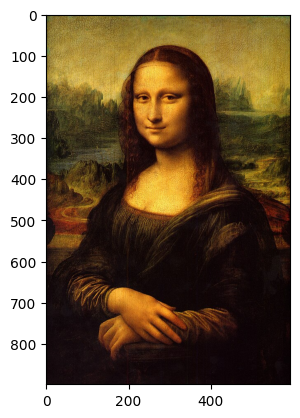

In [2]:
#external libraries used: numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
img= plt.imread('Mona_Lisa.jpg')
plt.imshow(img)

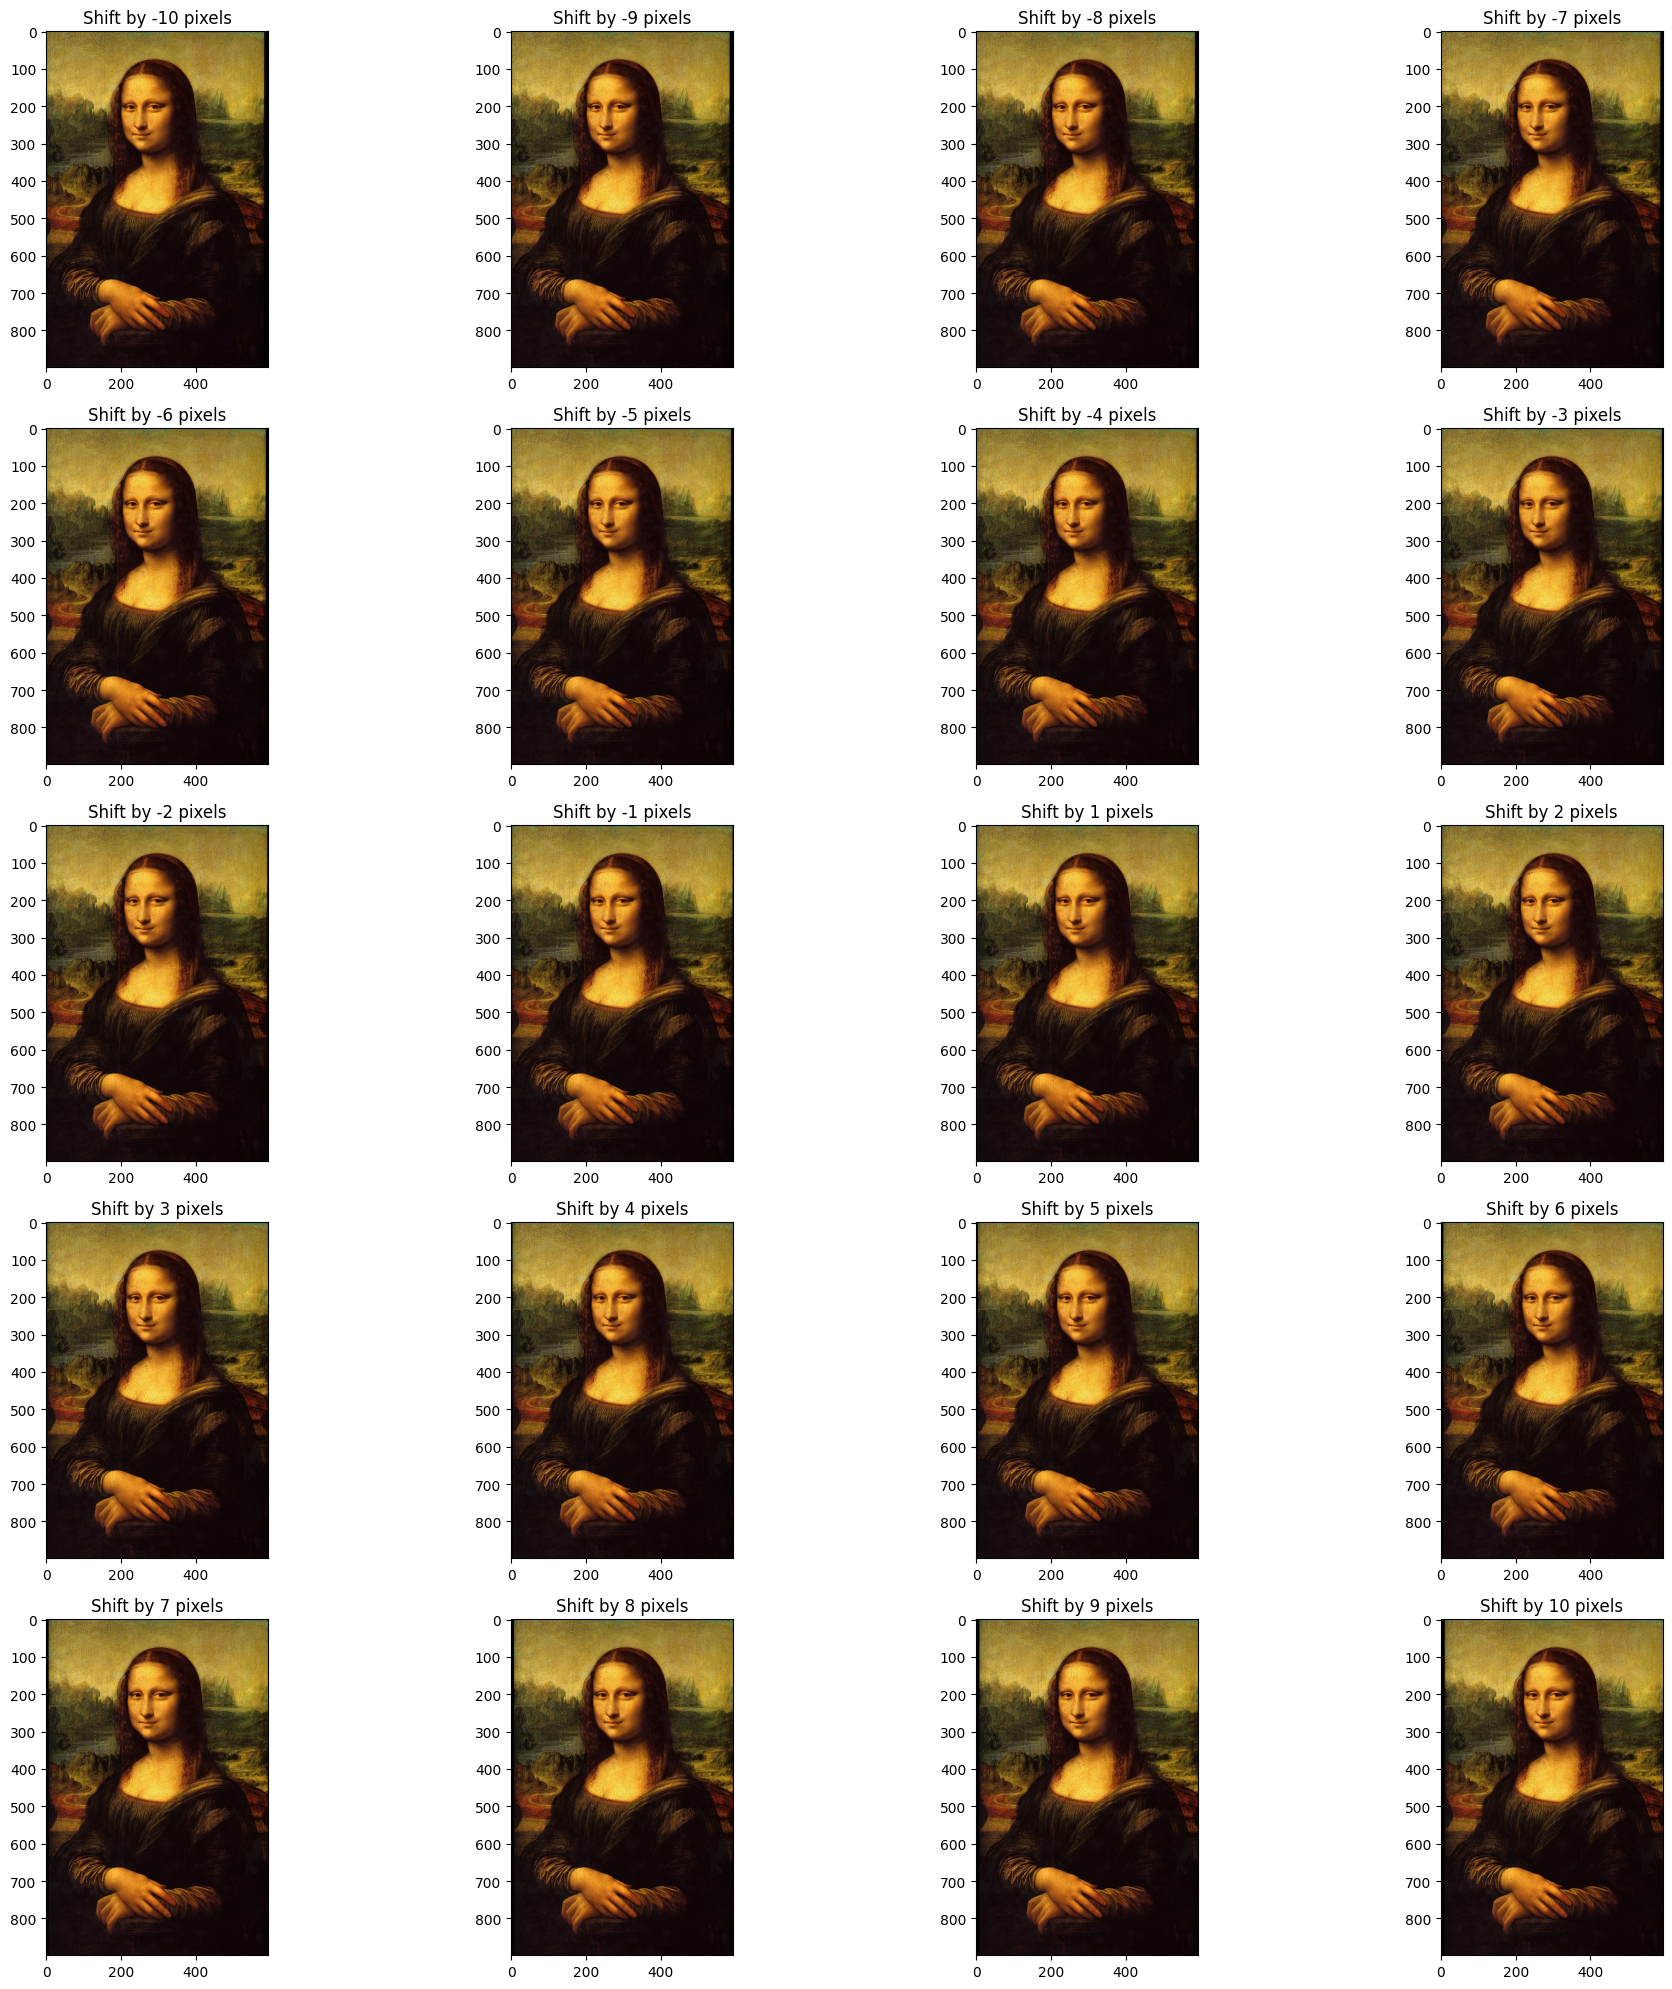

In [23]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))  
shifts = [i for i in range(-10, 11) if i != 0]
correlation_coefficients=[]
for index, i in enumerate(shifts):
    img_new = np.zeros_like(img)
    if i < 0:  
        img_new[:, :i] = img[:, -i:]  
    elif i > 0: 
        img_new[:, i:] = img[:, :-i]  
    ax = axes[index // 4, index % 4]  
    ax.imshow(img_new)
    ax.set_title(f"Shift by {i} pixels")
    correlation_coefficients.append(np.corrcoef(img.flatten(), img_new.flatten())[0, 1])
plt.tight_layout()
plt.show()


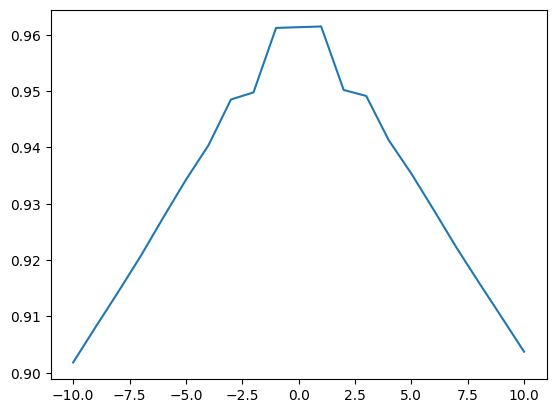

In [24]:
plt.plot(shifts, correlation_coefficients)
plt.show()

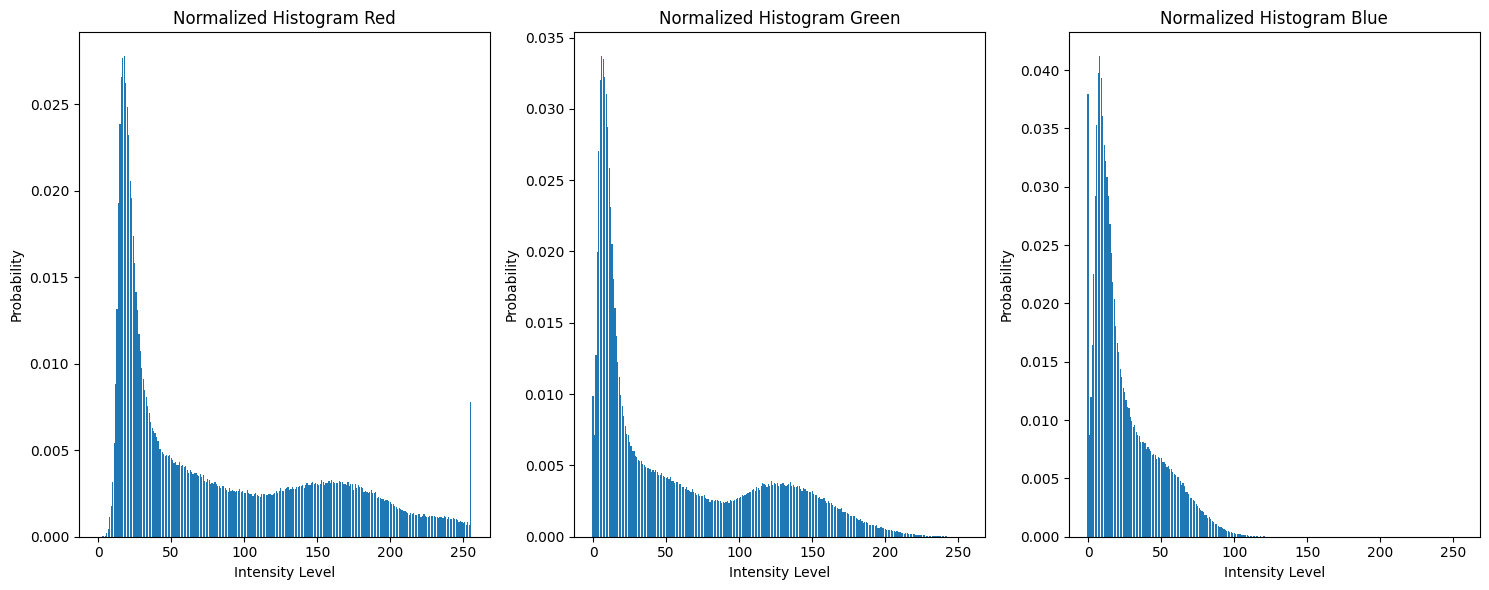

In [27]:
L = 256
hist_red = np.zeros(L)
hist_green = np.zeros(L)
hist_blue = np.zeros(L)
for color_channel, hist in zip(range(3), [hist_red, hist_green, hist_blue]):
    channel_data = img[:, :, color_channel].flatten()
    for value in channel_data:
        hist[int(value)] += 1
M, N, _ = img.shape
total_pixels = M * N
normalized_hist_red = hist_red / total_pixels
normalized_hist_green = hist_green / total_pixels
normalized_hist_blue = hist_blue / total_pixels
intensity_levels = np.arange(L)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.bar(intensity_levels, normalized_hist_red)
plt.title("Normalized Histogram Red")
plt.xlabel("Intensity Level")
plt.ylabel("Probability")
plt.subplot(1, 3, 2)
plt.bar(intensity_levels, normalized_hist_green)
plt.title("Normalized Histogram Green")
plt.xlabel("Intensity Level")
plt.ylabel("Probability")
plt.subplot(1, 3, 3)
plt.bar(intensity_levels, normalized_hist_blue)
plt.title("Normalized Histogram Blue")
plt.xlabel("Intensity Level")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()
